# Hausaufgabe 5
## Schallerzeugung durch einen umströmten Zylinder (Teil 2)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig Wirbelstraßen aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Zusätzlich zu dem in Hausaufgabe 4 ausgewerteten Messungen wurde die Schallabstrahlung von 9 Zylindern unterschiedlichen Durchmessers bei 13 verschiedenen Strömungsgeschwindigkeiten gemessen und der jeweilige Hiebton bestimmt.
Die Ergebnisse sind in tabellarischer Form in der Datei `vf.csv` eingetragen.

__1) Laden Sie die detektierten Hiebtöne aus der Datei `vf.csv` und visualisieren Sie die Daten.__
  * Stellen Sie in Abb. 1 den Verlauf der Frequenzen über der Strömungsgeschwindigkeit für jeden Durchmesser dar. Zeichnen Sie in dieselbe Abbildungen die gefundenen Hiebtöne aus der letzten HA ein.
  * Stellen Sie in Abb. 2 den Verlauf der Frequenzen über dem Zylinderdurchmesser für jede Strömungsgeschwindigkeit dar.  
  * Stellen Sie in Abb. 3 die Abhängigkeit der Frequenz von sowohl der Strömungsgeschwindigkeit als auch des Zylinderdurchmessers dar (z.B. über einen Konturplot)
  * Fügen Sie jeweils eine aussagekräftige Legende bzw. Farbskala hinzu und achten Sie auf korrekte Achsenbeschriftungen.
  * *Zusatzaufgabe: Lesen Sie neben den Frequenzen auch die Durchmesser-Werte automatisiert ein, anstelle sie per Hand einzugeben.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [2]:
import unittest
t = unittest.TestCase()

In [3]:
path = './data_HA5/'
filename_HA5 = 'vf.csv'
filename_HA4 = 'vf_d6mm_HA4.csv'
path_HA5 = path + filename_HA5
path_HA4 = path + filename_HA4

In [4]:
df_HA5 = pd.read_csv(path_HA5,header=1) # header=1 --> 0. row is omitted
df_HA5

,# v0 in m/s,d=3mm,d=4mm,d=5mm,d=7mm,d=9mm,d=11mm,d=13mm,d=16mm,d=20mm
0,8.32,543.04,408.10,329.83,234.27,184.14,149.89,125.13,101.42,81.67
1,10.73,702.87,522.33,425.56,297.68,234.59,190.87,163.48,132.67,105.90
2,14.10,914.43,689.08,552.86,400.17,307.89,254.11,215.73,173.16,138.90
3,18.69,1210.97,918.65,740.07,524.51,411.06,337.24,284.78,230.46,185.08
4,22.10,1446.13,1087.37,881.73,622.21,483.80,397.48,336.60,274.14,217.86
5,25.06,1638.99,1231.13,992.45,710.41,548.76,449.56,381.22,308.65,247.42
6,29.76,1962.34,1462.56,1177.07,843.65,651.46,537.05,452.85,367.34,295.30
7,34.00,2236.47,1677.31,1341.23,957.86,745.89,610.97,518.58,420.16,336.71
8,37.25,2447.92,1841.72,1471.93,1055.76,819.18,666.91,566.73,460.14,369.54
9,40.95,2694.82,2026.79,1621.68,1154.95,899.34,736.58,621.65,510.68,405.74


In [5]:
df_HA4 = pd.read_csv(path_HA4)
df_HA4

,Speed [m/s],Char. Tone [Hz]
0,8.32,272.8
1,10.73,351.7
2,14.10,463.0
3,18.69,614.7
4,22.10,727.2
5,25.06,825.0
6,29.76,980.2
7,34.00,1120.1
8,37.25,1227.6
9,40.95,1349.7


In [6]:
def name2dm(filename):
    """
    Return diameter(dm) from filename
    AB_d???mm_CDE.csv
    dm = d???mm [mm]
    """
    s = filename.find('_') + 1
    e = filename[s:].find('_') + s
    return filename[s] + '='+ filename[s+1:e]

In [7]:
def cutout(List,front,after,t=str):
    """
    cut out string from list of strings
    args:
        List:  list of strings
        front: char. in front of the string which we want to cut out
        after: char. after the string which we want to cut out
        t:     type
    return:
        L:     list of cut out
    """
    L = []
    for l in List:
        f = l.find(front)
        a = l.find(after)
        L.append(t(l[f+1:a]))
    return L

In [8]:
def indexbefore(L,x):
    """
    arg:
        L:      sorted list
        x:      number
    return:
        index: index of number before of x
    """
    if L[0] < L[-1]:
        for i in range(len(L)):
            if x <= L[i]:
                return i-1
    if L[0] > L[-1]:
        for i in range(len(L)):
            if x >= L[i]:
                return i-1

In [9]:
# Test of indexbefore()
L = [0,1,2,3,4,5,6]
L_ = [6,5,4,3,2,1,0]
x = 4
indexbefore(L,x), indexbefore(L_,x)

(3, 1)

In [10]:
def ratio(x1,x3,y1,y2,y3):
    return x1+(y2-y1)/(y3-y1)*(x3-x1)

In [11]:
df_HA5.columns = df_HA5.columns.str.strip()           # header without spaces
header_HA5 = df_HA5.columns                           # header from data of HA5
header_HA4 = df_HA4.columns                           # header from data of HA4

x_HA5 = df_HA5[header_HA5[0]].tolist()                # velocity for x-axis from HA5
x_HA4 = df_HA4[header_HA4[0]].tolist()                # velocity for x-axis from HA4

dm_HA4 = name2dm(filename_HA4)                        # dm from HA4 as string --> header for DataFrame
dm_HA4_int = cutout([dm_HA4],"=","m",int)             # header --> dm as int
dm_HA5_int = cutout(header_HA5[1:],"=","m",int)       # header --> dm as int
index = indexbefore(dm_HA5_int,dm_HA4_int[0])         # position dm_HA4 in dm_HA5, but the_real_pos = pos+2

t.assertEqual(x_HA5,x_HA4,"velocities are not the same.") # check if velocity_HA4 == velocity_HA5

if dm_HA4 not in header_HA5:
    df_HA5.insert(loc=index+2,column=dm_HA4,value=df_HA4[header_HA4[1]]) # insert data from HA4 to df_HA5
df_HA5

,# v0 in m/s,d=3mm,d=4mm,d=5mm,d=6mm,d=7mm,d=9mm,d=11mm,d=13mm,d=16mm,d=20mm
0,8.32,543.04,408.10,329.83,272.8,234.27,184.14,149.89,125.13,101.42,81.67
1,10.73,702.87,522.33,425.56,351.7,297.68,234.59,190.87,163.48,132.67,105.90
2,14.10,914.43,689.08,552.86,463.0,400.17,307.89,254.11,215.73,173.16,138.90
3,18.69,1210.97,918.65,740.07,614.7,524.51,411.06,337.24,284.78,230.46,185.08
4,22.10,1446.13,1087.37,881.73,727.2,622.21,483.80,397.48,336.60,274.14,217.86
5,25.06,1638.99,1231.13,992.45,825.0,710.41,548.76,449.56,381.22,308.65,247.42
6,29.76,1962.34,1462.56,1177.07,980.2,843.65,651.46,537.05,452.85,367.34,295.30
7,34.00,2236.47,1677.31,1341.23,1120.1,957.86,745.89,610.97,518.58,420.16,336.71
8,37.25,2447.92,1841.72,1471.93,1227.6,1055.76,819.18,666.91,566.73,460.14,369.54
9,40.95,2694.82,2026.79,1621.68,1349.7,1154.95,899.34,736.58,621.65,510.68,405.74


In [12]:
header = df_HA5.columns.tolist()          # header
velocity = df_HA5[header[0]].tolist()     # velocity as array
diameter = cutout(header[1:],"=","m",int) # diameter as array
values = np.array(df_HA5.values.tolist())
FF = values[:,1:]                         # frequence as matrix

DD,VV = np.meshgrid(diameter,velocity)

print(VV.shape,DD.shape,FF.T.shape)

(13, 10) (13, 10) (10, 13)


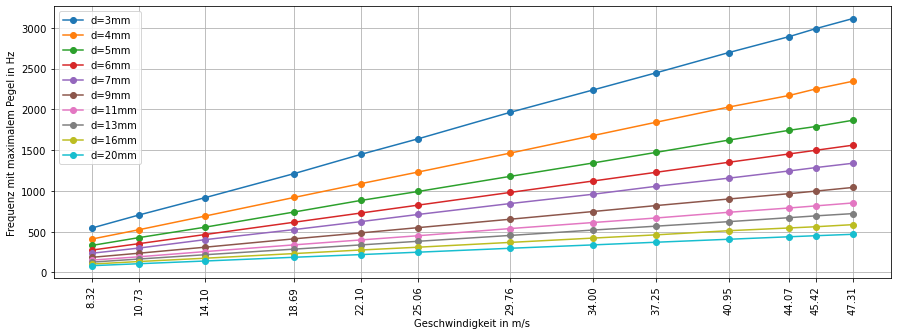

In [13]:
plt.figure(figsize=(15,5))
for label in header[1:]:
    plt.plot(velocity,df_HA5[label],"o-",label=label)
plt.legend()
plt.xticks(velocity,rotation=90)
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Frequenz mit maximalem Pegel in Hz")
plt.grid()

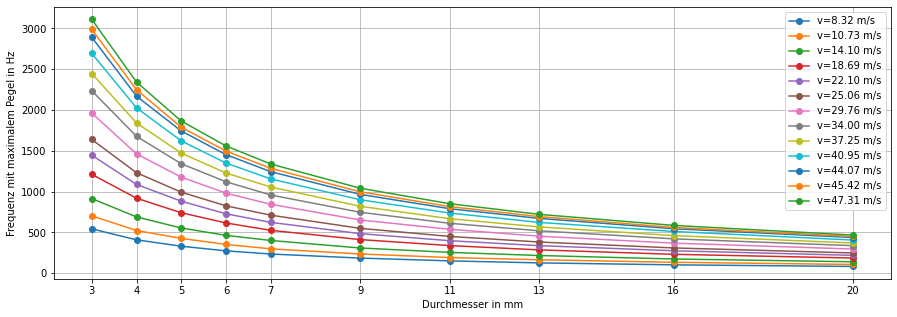

In [14]:
plt.figure(figsize=(15,5))
for y in values:
    plt.plot(diameter,y[1:],'o-',label=f"v={y[0]:.2f} m/s")
plt.legend()
plt.xticks(diameter)
plt.xlabel("Durchmesser in mm")
plt.ylabel("Frequenz mit maximalem Pegel in Hz")
plt.grid()

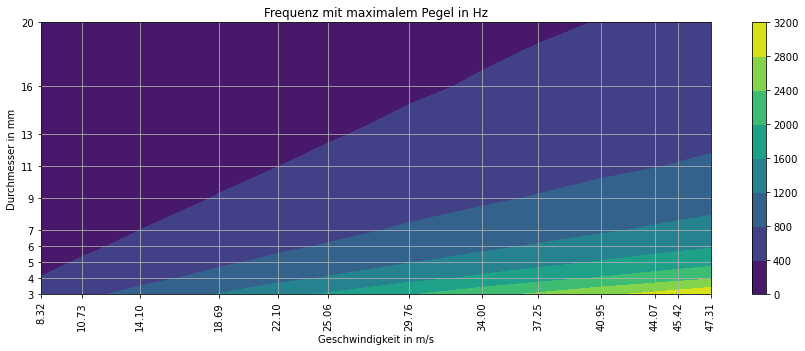

In [15]:
plt.figure(figsize=(15,5))
plt.contourf(VV,DD,FF)
plt.colorbar()
plt.xticks(velocity,rotation=90)
plt.yticks(diameter)
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Durchmesser in mm")
plt.title("Frequenz mit maximalem Pegel in Hz")
plt.grid()

In [16]:
%matplotlib widget

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
S = ax.plot_surface(VV,DD,FF,cmap='viridis')
fig.colorbar(S)
ax.set_xticks(velocity)
ax.set_yticks(diameter)
ax.set_xlabel("Geschwindigkeit in m/s")
ax.set_ylabel("Durchmesser in mm")
ax.set_title("Frequenz mit maximalem Pegel in Hz");

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Die Frequenz des Hiebtons hängt mindestens von den zwei Größen Durchmesser und Geschwindigkeit ab:
$$
f = f(d,v)
$$
Die Abhängigkeit von $v$ (Abb. 1) wurde in HA 4 mittels der Regressionsgerade gefunden. 
Die Abhängigkeit von $d$ (Abb. 2) könnte nach demselben Schema geschehen, allerdings trifft die Annahme einer direkt linearen Abhängigkeit offensichtlich nicht zu.
Außerdem wäre es wünschenswert, beide Parameter einer einzigen Berechnungsformel übergeben zu können.

Im einfachsten Fall mit nur linearen Abhängigkeiten könnten wir schreiben:
$$
f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon
$$
Die Koeffizienten $\beta_n$ erfüllen denselben Zweck wie $a$ und $b$ aus HA 4. 
$\epsilon$ ist eine Störgröße, die als zufällig angenommen wird und die den Fehler beschreibt, den das Modell z.B. durch unbeobachtbare Abhängigkeiten macht.
Die Lösung eines Problems mithilfe einer solchen Formulierung geschieht über die [multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression).

Nichtlineare Abhängigkeiten können mit diesem Schema auch untersucht werden, sofern eine Annahme zur Art der Nichtlinearität getroffen wird, z.B.:
$$
f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,d^2 + \ldots + \beta_4\,\frac{d}{v} + \beta_5\,\frac{v}{d} + \ldots + \beta_6\,\sin(v^\sqrt{d}) + \ldots +  \epsilon
$$
Das Modell kann dabei beliebig komplex werden.
Allgemein können wir auch schreiben:
$$
f = \pmb{x} \cdot \pmb{\beta} + \epsilon~,
$$
wobei der Vektor $\pmb{x}$ die charakteristischen Größen wie $d$, $v$ oder daraus abgeleitete Terme enthält (im maschinellen Lernen wird hier auch von *Features* gesprochen) und $\pmb{\beta}$ die zunächst noch unbekannten Koeffizienten.

Natürlich sollen unsere Messdaten (gekennzeichnet mit Tilde $\tilde{}$) durch das Modell beschreibbar sein, sodass gilt:
$$
\tilde{f}_i = \pmb{x}_i \cdot \pmb{\beta} + \epsilon_i
$$
bzw. wenn wir die Vektoren $\pmb{x}_i$ als Zeilen in eine Matrix $\pmb{X}$ schreiben:
$$
\pmb{\tilde{f}}  = \pmb{X} \cdot \pmb{\beta} + \pmb{\epsilon}~.
$$
In die Form dieser Gleichung wollen wir nun unsere Größen bringen.

**2) Erstellen Sie aus den Strömungsgeschwindigkeiten und Zylinderdurchmessern eine Modellmatrix $\pmb{X}$ und aus den zugehörigen Frequenzen den Messvektor $\pmb{\tilde{f}}$.**
  * Für die Generierung von $\pmb{X}$ muss bereits ein Modell angenommen werden. Verwenden Sie zunächst $\tilde{f}_i = \beta_0\cdot 1 + \beta_1\cdot d_i + \beta_2\cdot v_i + \epsilon_i$. Das Modell soll jedoch später leicht ausgetauscht werden können.
  * Geben Sie die Dimensionen der beiden erstellten Größen aus.
  * Plotten Sie zur Überprüfung die Spalten der Matrix $\pmb{X}$ über $\pmb{\tilde{f}}$.
 
*Hinweis: Der unbekannte Fehler $\epsilon_i$ ist immer implizit enthalten und muss hier nicht über eine eigene Variable "mitmodelliert" werden.*

In [18]:
df_HA5

,# v0 in m/s,d=3mm,d=4mm,d=5mm,d=6mm,d=7mm,d=9mm,d=11mm,d=13mm,d=16mm,d=20mm
0,8.32,543.04,408.10,329.83,272.8,234.27,184.14,149.89,125.13,101.42,81.67
1,10.73,702.87,522.33,425.56,351.7,297.68,234.59,190.87,163.48,132.67,105.90
2,14.10,914.43,689.08,552.86,463.0,400.17,307.89,254.11,215.73,173.16,138.90
3,18.69,1210.97,918.65,740.07,614.7,524.51,411.06,337.24,284.78,230.46,185.08
4,22.10,1446.13,1087.37,881.73,727.2,622.21,483.80,397.48,336.60,274.14,217.86
5,25.06,1638.99,1231.13,992.45,825.0,710.41,548.76,449.56,381.22,308.65,247.42
6,29.76,1962.34,1462.56,1177.07,980.2,843.65,651.46,537.05,452.85,367.34,295.30
7,34.00,2236.47,1677.31,1341.23,1120.1,957.86,745.89,610.97,518.58,420.16,336.71
8,37.25,2447.92,1841.72,1471.93,1227.6,1055.76,819.18,666.91,566.73,460.14,369.54
9,40.95,2694.82,2026.79,1621.68,1349.7,1154.95,899.34,736.58,621.65,510.68,405.74


In [19]:
# X: xi = [1,di,vi]
# F: fi = Frequence(di,vi)

D = DD.flatten()
V = VV.flatten()
O = np.ones(len(D))
FF_tilde = FF
F_tilde = FF_tilde.flatten()

Dict_X = {"1":O,"d":D,"v":V}
df_X = pd.DataFrame(Dict_X)

Dict_F_tilde = {"f_tilde":F_tilde}
df_f_tilde = pd.DataFrame(Dict_F_tilde)

df_X,df_f_tilde

(       1   d      v
 0    1.0   3   8.32
 1    1.0   4   8.32
 2    1.0   5   8.32
 3    1.0   6   8.32
 4    1.0   7   8.32
 ..   ...  ..    ...
 125  1.0   9  47.31
 126  1.0  11  47.31
 127  1.0  13  47.31
 128  1.0  16  47.31
 129  1.0  20  47.31
 
 [130 rows x 3 columns],
      f_tilde
 0     543.04
 1     408.10
 2     329.83
 3     272.80
 4     234.27
 ..       ...
 125  1040.97
 126   850.95
 127   720.31
 128   584.99
 129   466.74
 
 [130 rows x 1 columns])

In [20]:
%matplotlib inline

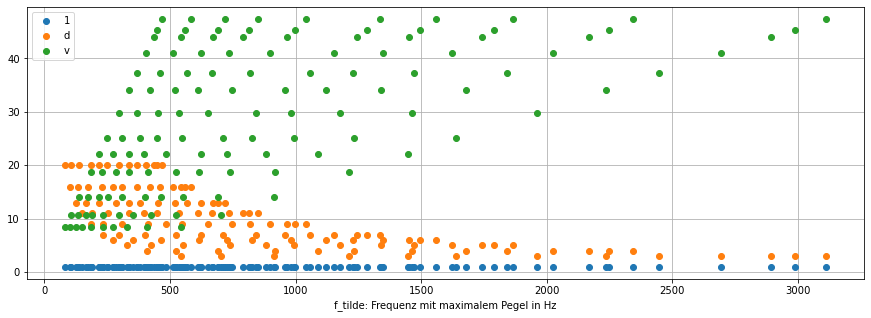

In [21]:
plt.figure(figsize=(15,5))
header = df_X.columns.tolist()
for h in header:
    plt.plot(df_f_tilde,df_X[h],'o',label=h)
plt.legend()
plt.xlabel(f"{df_f_tilde.columns[0]}: Frequenz mit maximalem Pegel in Hz")
plt.grid()

Angenommen, es existiert ein Modell für $f(d,v)$ mit bekannten Koeffizienten $\beta_i$, so kann dessen Güte anhand der Abweichungen von mit dem Modell berechneten zu den gemessenen Daten bewertet werden.
Diese Abweichungen werden häufig mithilfe der Summe der Fehlerquadrate (normiert mit der Anzahl der Messpunkte $N$) quantifiziert:
$$
\frac{1}{N}\sum_{i=1}^{N}(f(d_i,v_i) - \tilde{f}_i)^2 = \frac{1}{N}\| \pmb{f} - \pmb{\tilde{f}} \|_2^2
$$
Dieses Fehlermaß gilt es zu minimieren, um ein Modell möglichst genau an die Messdaten anzunähern.
Es wird daher auch als Kosten- oder Verlustfunktion bezeichnet.

__3) Schreiben Sie eine Funktion *loss()*, die die normierte Summe der Fehlerquadrate berechnet.__
  * Die Funktion soll als Parameter übergeben bekommen:
    * einen Koeffizienten-Vektor `beta`
    * eine Modell-Matrix `X`
    * einen Messwerte-Vektor `f_tilde`
  * Rückgabewert soll der berechnete Fehler sein.
  * Testen Sie die Funktion mit dem Beispielmodell und `beta = array([1., 1., 1.])`

<!--
[Multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression)
-->

In [22]:
def loss(beta,X,f_tilde,func_f):
    f = func_f(X,beta)
    return np.mean((f-f_tilde)**2)

Mithilfe eines geeigneten Algorithmus' soll nun der Koeffizientensatz $\pmb{\beta}$ gefunden werden, der obige Kostenfunktion minimiert.
Praktischerweise sind im Modul [*scipy.optimize*](https://docs.scipy.org/doc/scipy/reference/optimize.html) bereits zahlreiche Minimierungsalgorithmen implementiert, die auf das Problem angewendet werden können.

Für den Fall der Mehrfachregression bietet sich die im Modul enthaltene Funktion [*minimize()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) an.
Wichtig sind hier vor allem die ersten drei Parameter, die ihr übergeben werden können:
  * `fun` : die Funktion, deren Ergebnis minimal werden soll (zu übergeben als Objekt _ohne_ Klammern)
  * `x0` : Startwerte für die zu ermittelnden Koeffizienten (als Array zu übergeben)
  * `args`: weitere Argumente, die die Funktion beim Aufruf erwartet (je nach Parameterliste, als Tupel übergeben)

Voraussetzung ist, dass die Argumente der Parameterliste der zu minimierenden Funktion in der Reihenfolge `(x, *args)` erwartet werden, also zunächst die  Koeffizienten, dann weitere Parameter. 
Dies sollte mit der Funktion *loss()* gegeben sein.

Die *minimize()*-Funktion gibt ein [OptimizeResult-Objekt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html) zurück.
Rufen wir die Funktion mit
```python
result = minimize(...)
```
auf, können z.B. folgende Eigenschaften abgerufen werden:
  * `result.x` : die gefundenen Koeffizienten
  * `result.success` : Boolean, der angibt, ob ein Minimum gefunden wurde
  * `result.nit` : Anzahl der vom Algorithmus durchgeführten Iterationen


__4) Finden Sie ein möglichst simples Modell, dass die Daten möglichst gut beschreibt.__
  * Kopieren Sie benötigten Quellcode aus Aufgabe 2) in die nächste Zelle, um das Modell schnell ändern zu können. Aufgabe 2) soll unverändert bleiben.
  * Minimieren Sie die Kostenfunktion. Wählen Sie als Startwert für jeden der Koeffizienten 1.
  * Suchen Sie Koeffizienten mindestens für folgende Modelle:
    *  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon$ 
    *  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \beta_3\,\frac{1}{d^2} + \beta_4\,\frac{1}{v^2} + \epsilon$ 
    *  $f(d,v) = \beta_1\,\frac{v}{d}  + \beta_2\,\frac{v^3}{d^3} + \beta_3\,\frac{v^5}{d^5}  + \epsilon$
  * Geben Sie die Anzahl der Iterationen, den berechneten Koeffizientensatz und für diesen den Wert der Kostenfunktion aus. Geben Sie außerdem an, ob der Algorithmus das Minimum eindeutig gefunden hat.
  * Falls die Minimierung nicht erfolgreich/eindeutig war, versuchen Sie, das Modell zu ändern. Möglicherweise führt auch eine Vereinfachung zum Erfolg.
  * Plotten Sie jeweils das gemessene $\pmb{\tilde{f}}$ und das sich aus dem Modell ergebende $\pmb{f}$ in dasselbe Diagramm, um die Abweichung einschätzen zu können.

In [23]:
def func_f1(X,beta,E=False):
    """
    X=[1,di,vi]: nxd (data points x dimension)
    beta:        1x3 (1 x 3)
    E:           1xn (1 x data points)
    """
    if E == False:
        n,d = X.shape
        E = np.zeros((1,n))
    return beta@X.T + E

In [24]:
def func_f2(X,beta,E=False):
    """
    X=[1,di,vi]: nxd (data points x dimension)
    beta:        1x3 (1 x 5)
    E:           1xn (1 x data points)
    """
    if E == False:
        n,d = X.shape
        E = np.zeros((1,n))
    return beta[:3]@X.T + beta[3:]@((X[:,1:].T)**(-2.)) + E

In [25]:
def func_f3(X,beta,E=False):
    """
    X=[1,di,vi]: nxd (data points x dimension)
    beta:        1x3 (1 x 3)
    E:           1xn (1 x data points)
    """
    if E == False:
        n,d = X.shape
        E = np.zeros((1,n))
    X_ = np.array([X[:,2]/X[:,1], (X[:,2]/X[:,1])**3, (X[:,2]/X[:,1])**5])
    return beta@X_ + E

In [26]:
def func_f4(X,beta,E=False):
    """
    X=[1,di,vi]: nxd (data points x dimension)
    beta:        1x3 (1 x 2)
    E:           1xn (1 x data points)
    """
    if E == False:
        n,d = X.shape
        E = np.zeros((1,n))
    X_ = np.array([X[:,2], (X[:,1])**(-2.)])
    return beta@X_ + E

In [27]:
def plot_3f_3d(VV,DD,FF_tilde,FF_0,FF_n,colorbar=False):
    
    F = [FF_tilde,FF_0,FF_n]
    L = ['f_tilde (Messdaten)','f_0 (Modell)','f_n (Modell)']
    C = ['Greens','Reds','Blues']
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    
    for f,c,l in zip(F,C,L):
        S = ax.plot_surface(VV,DD,f,cmap=c,label=l)
        S._facecolors2d = S._facecolors3d
        S._edgecolors2d = S._edgecolors3d

        if colorbar != False:
            cbar = fig.colorbar(S)
            cbar.set_label(l, rotation=90)
        else:
            ax.legend(labelcolor=['g','r','b'])
        
    ax.set_xticks(velocity)
    ax.set_yticks(diameter)
    ax.set_xlabel("Geschwindigkeit in m/s")
    ax.set_ylabel("Durchmesser in mm")
    ax.set_title("Frequenz mit maximalem Pegel in Hz");
    plt.show()

In [28]:
%matplotlib widget

In [29]:
def test_minimize(X,f_tilde,beta_0,func):
    result = minimize(loss,beta_0,(X,f_tilde,func))
    beta_n = result.x
    n = result.nit
    textspace = ''
    if n < 10:
        textspace = ' '

    F_0 = func(X,beta_0,E=False)       # model with beta_0
    FF_0 = F_0.reshape(FF_tilde.shape) # model with beta_0

    F_n = func(X,beta_n,E=False)       # model with beta_n
    FF_n = F_n.reshape(FF_tilde.shape) # model with beta_n

    loss_0 = loss(beta_0,X,f_tilde,func) # loss with beta_0
    loss_n = loss(beta_n,X,f_tilde,func) # loss with beta_n
    print(f"Test with {func.__name__}")
    print(f"Succsess:\t{result.success}\nIterations:\t{n}\nBeta_0:\t\t{beta_0}\nBeta_{n}:{textspace}\t{beta_n}\nLoss_0:\t\t{loss_0:.1f}\nLoss_{n}:{textspace}\t{loss_n:.1f}")
    plot_3f_3d(VV,DD,FF_tilde,FF_0,FF_n)
    plot_3f_3d(VV,DD,FF_tilde,FF_0,FF_n,colorbar=True)

In [30]:
X = df_X.values
f_tilde = df_f_tilde.values.T

In [31]:
test_minimize(X,f_tilde,np.ones(3),func_f1)

Test with func_f1
Succsess:	False
Iterations:	15
Beta_0:		[1. 1. 1.]
Beta_15:	[761.57502732 -81.28502166  29.38751619]
Loss_0:		1094993.4
Loss_15:	109467.1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
test_minimize(X,f_tilde,np.ones(5),func_f2)

Test with func_f2
Succsess:	False
Iterations:	107
Beta_0:		[1. 1. 1. 1. 1.]
Beta_107:	[-4.90610825e+01 -2.99197035e+01  2.93902233e+01  1.11183530e+04
  1.06153428e+01]
Loss_0:		1094911.4
Loss_107:	51473.2


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
test_minimize(X,f_tilde,np.ones(3),func_f3)

Test with func_f3
Succsess:	False
Iterations:	10
Beta_0:		[1. 1. 1.]
Beta_10:	[ 1.97336471e+02  2.29116127e-03 -1.07780500e-05]
Loss_0:		19713694728.5
Loss_10:	13.1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
test_minimize(X,f_tilde,0*np.ones(3),func_f3)

Test with func_f3
Succsess:	True
Iterations:	5
Beta_0:		[0. 0. 0.]
Beta_5: 	[ 1.97336470e+02  2.29116728e-03 -1.07780712e-05]
Loss_0:		1165948.4
Loss_5: 	13.1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
test_minimize(X,f_tilde,np.ones(2),func_f4)

Test with func_f4
Succsess:	False
Iterations:	13
Beta_0:		[1. 1.]
Beta_13:	[   18.39385381 12947.37248468]
Loss_0:		1107357.4
Loss_13:	90699.6


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

**5) Wenden Sie die das Modell an.**
  * Wie hoch ist die Hiebton-Frequenz bei einem Zylinderdurchmesser von 10 mm und einer Strömungsgeschwindigkeit von 20 m/s?
  * Wie groß ist der Durchmesser eines Zylinders, der bei 42 m/s Windgeschwindigkeit mit 1000 Hz pfeift?
  * Wie groß ist die Strömungsgeschwindigkeit, wenn ein Zylinder mit 30 mm Durchmesser einen Ton bei 300 Hz verursacht?

In [36]:
df_HA5

,# v0 in m/s,d=3mm,d=4mm,d=5mm,d=6mm,d=7mm,d=9mm,d=11mm,d=13mm,d=16mm,d=20mm
0,8.32,543.04,408.10,329.83,272.8,234.27,184.14,149.89,125.13,101.42,81.67
1,10.73,702.87,522.33,425.56,351.7,297.68,234.59,190.87,163.48,132.67,105.90
2,14.10,914.43,689.08,552.86,463.0,400.17,307.89,254.11,215.73,173.16,138.90
3,18.69,1210.97,918.65,740.07,614.7,524.51,411.06,337.24,284.78,230.46,185.08
4,22.10,1446.13,1087.37,881.73,727.2,622.21,483.80,397.48,336.60,274.14,217.86
5,25.06,1638.99,1231.13,992.45,825.0,710.41,548.76,449.56,381.22,308.65,247.42
6,29.76,1962.34,1462.56,1177.07,980.2,843.65,651.46,537.05,452.85,367.34,295.30
7,34.00,2236.47,1677.31,1341.23,1120.1,957.86,745.89,610.97,518.58,420.16,336.71
8,37.25,2447.92,1841.72,1471.93,1227.6,1055.76,819.18,666.91,566.73,460.14,369.54
9,40.95,2694.82,2026.79,1621.68,1349.7,1154.95,899.34,736.58,621.65,510.68,405.74


In [37]:
print(f"v in m/s:\t{velocity}\nd in mm:\t{diameter}")

v in m/s:	[8.32, 10.73, 14.1, 18.69, 22.1, 25.06, 29.76, 34.0, 37.25, 40.95, 44.07, 45.42, 47.31]
d in mm:	[3, 4, 5, 6, 7, 9, 11, 13, 16, 20]


In [38]:
# Daten
X = df_X.values
f_tilde = df_f_tilde.values.T
beta_0 = np.ones(3)
func = func_f3
result = minimize(loss,beta_0,(X,f_tilde,func))
beta_n = result.x

In [39]:
def f_dv(d,v,d_0,v_0,func,beta):
    """
    diameter,velocity --> frequence
    args:
        d:      diameter in mm
        v:      velocity in m/s
        d_0:    diameters from measurement (valid range for d)
        v_0:    velocities from measurement (valid range for v)
        func:   function of regression
        beta_n: beta from minimize()
    retrun:
        frequence in Hz
    """
    if d > max(d_0) or d < min(d_0):
        raise Exception('d is out of range')
    
    if v > max(v_0) or v < min(v_0):
        raise Exception('v is out of range')
    
    X = np.array([[1,d,v]])
    return func(X,beta)

In [40]:
# Test of f_dv(): diameter,velocity --> frequence
d = 10
v = 20
f = f_dv(d,v,diameter,velocity,func,beta_n)
print(f"f(d={d}mm, v={v}m/s) = {f[0][0]:.3f}Hz")

f(d=10mm, v=20m/s) = 394.691Hz


In [41]:
def d_fv(f,v,d_0,v_0,func,beta_n):
    """
    frequence,velocity --> diameter
    args:
        f:      frequence in Hz
        v:      velocity in m/s
        d_0:    diameters from measurement (valid range for d)
        v_0:    velocities from measurement (valid range for v)
        func:   function of regression
        beta_n: beta from minimize()
    retrun:
        diameter in mm
        new list of diameters for the iteration
    """
    if v > max(v_0) or v < min(v_0):
        raise Exception('v is out of range')

    O = np.ones(len(d_0))
    D = d_0
    V = [v]*len(d_0)
    X = np.array([O,D,V]).T
    F = func(X,beta_n)[0]

    if f > max(F) or f < min(F):
        raise Exception('f is out of range')

    if f in F:
        index = np.where(F==f)
        return D[index[0][0]], None

    index = indexbefore(F,f)
    return ratio(D[index+1],D[index],F[index+1],f,F[index]), np.linspace(D[index+1],D[index],5)

In [42]:
def d_fv_iter(f,v,diameter,velocity,tol=1e-3):
    """
    auxiliary iteration-function for d_fv()
    iteration is necessary, because of the non-linearity of the function
    """
    d,dnew = d_fv(f,v,diameter,velocity,func,beta_n)
    n = 0
    while type(dnew) != 'NoneType' and abs(f_dv(d,v,dnew,velocity,func,beta_n)[0][0]-f) > tol:
        n += 1
        d,dnew = d_fv(f,v,dnew,velocity,func,beta_n)
    return d,n  

In [43]:
# Test of d_fv(): frequence,velocity --> diameter
f = 1000
v = 42
#f = 500
#v = 8.32
tol = 1e-4

In [44]:
d,d0 = d_fv(f,v,diameter,velocity,func,beta_n)
print(f"d(f={f}Hz, v={v}m/s) = {d:.3f}mm")
X = np.array([[1,d,v]])
print(f"f_ist=  {f_dv(d,v,diameter,velocity,func,beta_n)[0][0]:.5f}Hz\nf_soll= {f:.5f}Hz")
print(f"Ohne Iteration ist die Abweichung {f_dv(d,v,diameter,velocity,func,beta_n)[0][0]-f:.5}")

d(f=1000Hz, v=42m/s) = 8.401mm
f_ist=  986.83889Hz
f_soll= 1000.00000Hz
Ohne Iteration ist die Abweichung -13.161


In [45]:
d,n = d_fv_iter(f,v,diameter,velocity,tol)
print(f"d(f={f}Hz, v={v}m/s) = {d:.3f}mm")
print(f"f_ist=  {f_dv(d,v,diameter,velocity,func,beta_n)[0][0]:.5f}Hz\nf_soll= {f:.5f}Hz")
print(f"Nach {n} Iterationen ist die Abweichung < {tol}")

d(f=1000Hz, v=42m/s) = 8.290mm
f_ist=  999.99999Hz
f_soll= 1000.00000Hz
Nach 5 Iterationen ist die Abweichung < 0.0001


In [46]:
def v_fd(f,d,d_0,v_0,func,beta_n):
    """
    frequence,diameter --> velocity
    args:
        f:      frequence in Hz
        d:      diameter in mm
        d_0:    diameters from measurement (valid range for d)
        v_0:    velocities from measurement (valid range for v)
        func:   function of regression
        beta_n: beta from minimize()
    retrun:
        velocity in m/s
    """
    if d > max(d_0) or d < min(d_0):
        raise Exception('d is out of range')

    O = np.ones(len(v_0))
    D = [d]*len(v_0)
    V = v_0
    X = np.array([O,D,V]).T
    F = func(X,beta_n)[0]

    if f in F:
        index = np.where(F==f)
        return V[index[0][0]]

    if f > max(F) or f < min(F):
        raise Exception('f is out of range')

    index = indexbefore(F,f)
    return ratio(V[index+1],V[index],F[index+1],f,F[index])

In [47]:
# Test of v_fd(): frequence,diameter --> velocity
f = 300
d = 30
#f = 1500
#d = 5.5
v = v_fd(f,d,diameter,velocity,func,beta_n)
print(f"v(f={f}Hz, d={d}mm) = {v:.3f}m/s")
X = np.array([[1,d,v]])
print(f"f_ist=  {f_dv(d,v,diameter,velocity,func,beta_n)[0][0]:.5f}Hz\nf_soll= {f:.5f}Hz")
print(f"Ohne Iteration ist die Abweichung {f_dv(d,v,diameter,velocity,func,beta_n)[0][0]-f:.5}")

Exception: d is out of range